In [1]:
import pandas as pd
import numpy as np
from statistics import multimode
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv('IMDb_movies.csv')
names = pd.read_csv('IMDb_names.csv')
ratings = pd.read_csv('IMDb_ratings.csv')

# Parte 1 (8 visualizações)

# Visualizações relacionadas a duração dos filmes

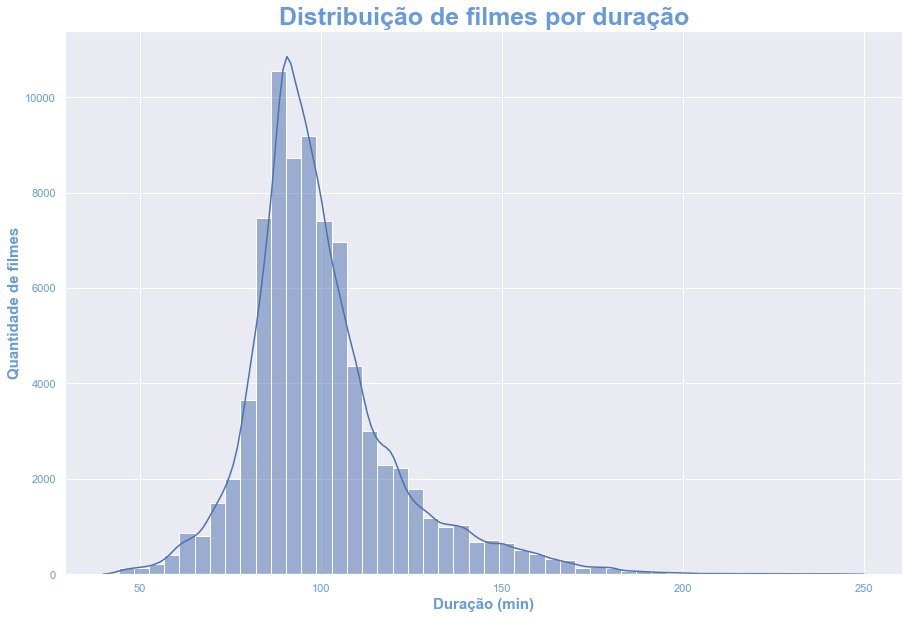

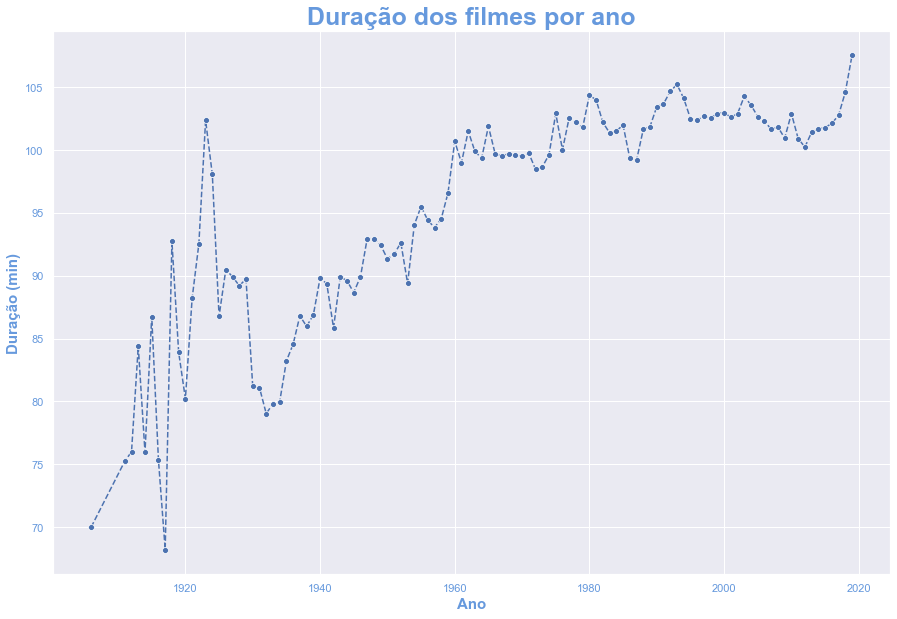

In [5]:
sns.set()
fig=plt.figure(figsize=(15,10))
sns.histplot(data=movies[movies['duration']<=250],x='duration',bins=50,kde=True)
plt.xlabel('Duração (min)',fontsize=15,fontweight='bold',c='#69d')
plt.xticks(color='#69d')
plt.yticks(color='#69d')
plt.ylabel('Quantidade de filmes',fontsize=15,fontweight='bold',c='#69d')
plt.title('Distribuição de filmes por duração',fontsize=25,fontweight='bold',c='#69d')
plt.show()

fig=plt.figure(figsize=(15,10))
gf =movies.groupby('year')['duration'].mean()
sns.lineplot(x=gf.index,y=gf.values,linestyle='--',marker='o')
plt.ylabel('Duração (min)',fontsize=15,fontweight='bold',c='#69d')
plt.xlabel('Ano',fontsize=15,fontweight='bold',c='#69d')
plt.xticks(color='#69d')
plt.yticks(color='#69d')
plt.title('Duração dos filmes por ano',fontsize=25,fontweight='bold',c='#69d')
plt.show()


# Visualizações relacionados aos diretores

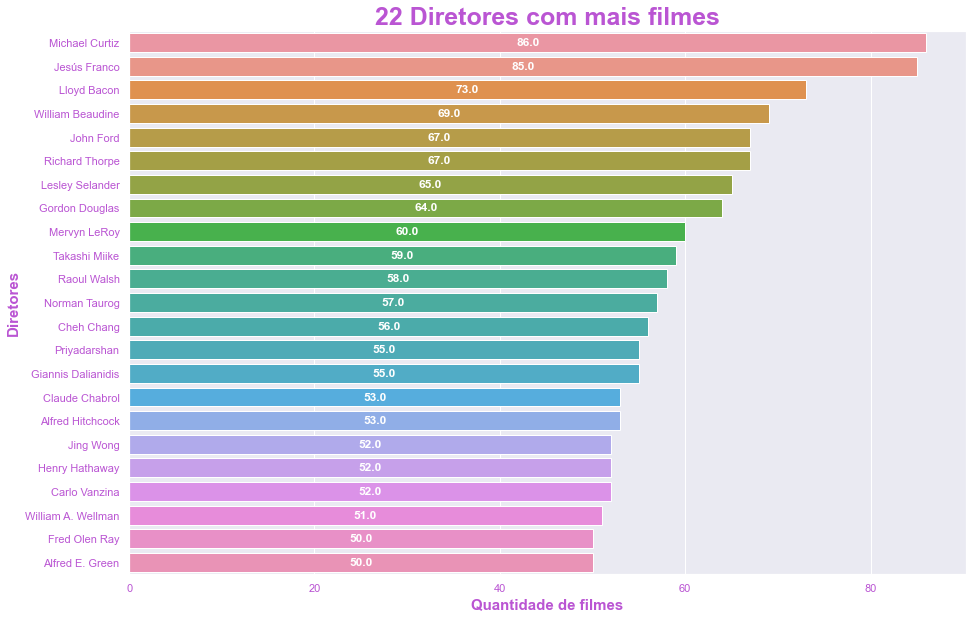

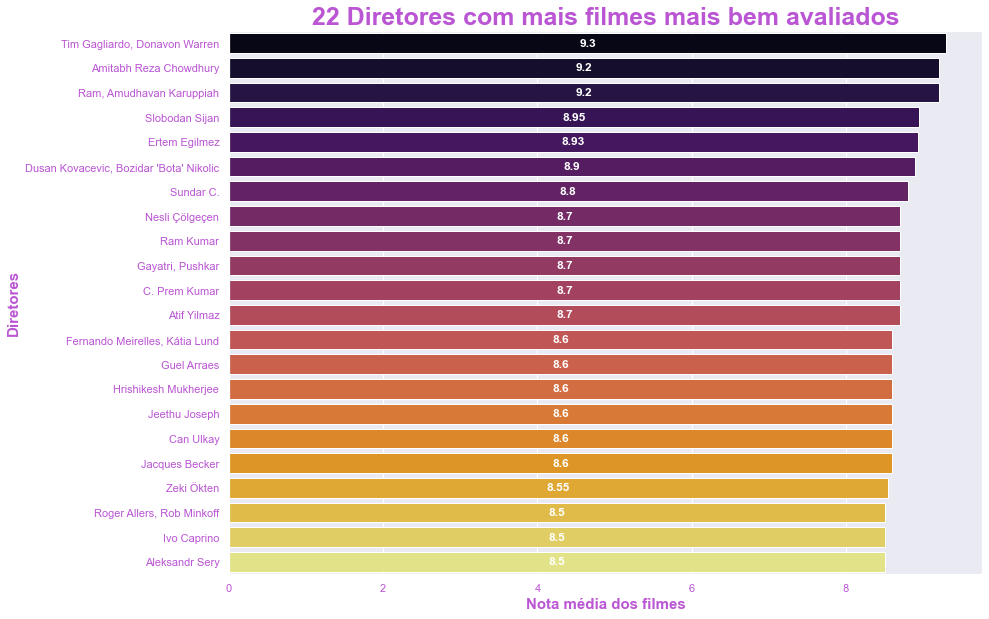

In [67]:
directors_rating = pd.merge(left=movies,right=ratings,how='left',on='imdb_title_id')
count_ranking = directors_rating.groupby('director')['imdb_title_id'].count().sort_values(ascending=False).reset_index()
count_ranking.rename(columns={'imdb_title_id':'number of movies made'},inplace=True)
top_50_directos = count_ranking[count_ranking['number of movies made']>=50]

n_votes_mean= directors_rating['total_votes'].mean()
directors_rating= directors_rating[directors_rating['total_votes']>=n_votes_mean]
mean_rating = directors_rating.groupby('director')['avg_vote'].mean().round(2).sort_values(ascending=False).reset_index()
top_votes_directos = mean_rating[mean_rating['avg_vote']>=8.5].head(22)


def text(ax):
    '''Colocar o texto em um cima de barras (y) e na meta da barra (x)'''
    for p in ax.patches:
        x = p.get_width()/2 + p.get_x()
        y = p.get_y() + p.get_height()/2
        ax.annotate(p.get_width(),(x,y),ha='center',va='center',fontsize=12,color='white',fontweight='bold')


fig = plt.figure(figsize=(15,10))
s= sns.barplot(data=top_50_directos,y='director',x='number of movies made',orient='h')
plt.ylabel('Diretores',fontsize=15,fontweight='bold',c='mediumorchid')
plt.xticks(color='#ba55d3')
plt.yticks(color='#ba55d3')
plt.xlabel('Quantidade de filmes',fontsize=15,fontweight='bold',c='mediumorchid')
plt.title('22 Diretores com mais filmes',fontsize=25,fontweight='bold',c='mediumorchid')
text(s)
plt.show()

fig=plt.figure(figsize=(13.5,10))
s= sns.barplot(data=top_votes_directos,y='director',x='avg_vote',orient='h',palette='inferno')
plt.ylabel('Diretores',fontsize=15,fontweight='bold',c='mediumorchid')
plt.xticks(color='#ba55d3')
plt.yticks(color='#ba55d3')
plt.xlabel('Nota média dos filmes',fontsize=15,fontweight='bold',c='mediumorchid')
plt.title('22 Diretores com mais filmes mais bem avaliados',fontsize=25,fontweight='bold',c='mediumorchid')
text(s)
plt.show()


# Visualizações relacionadas ao gênero


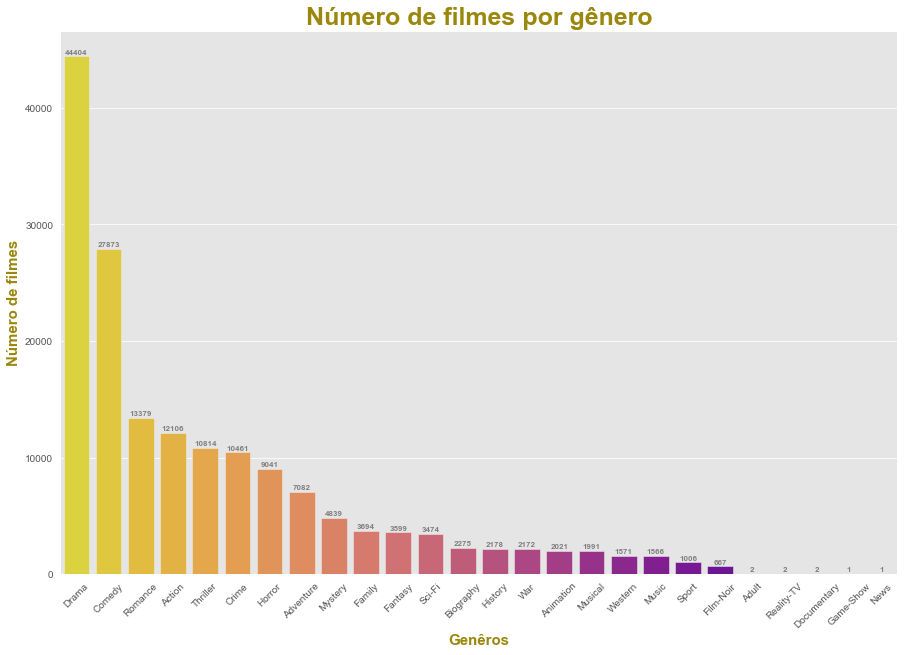

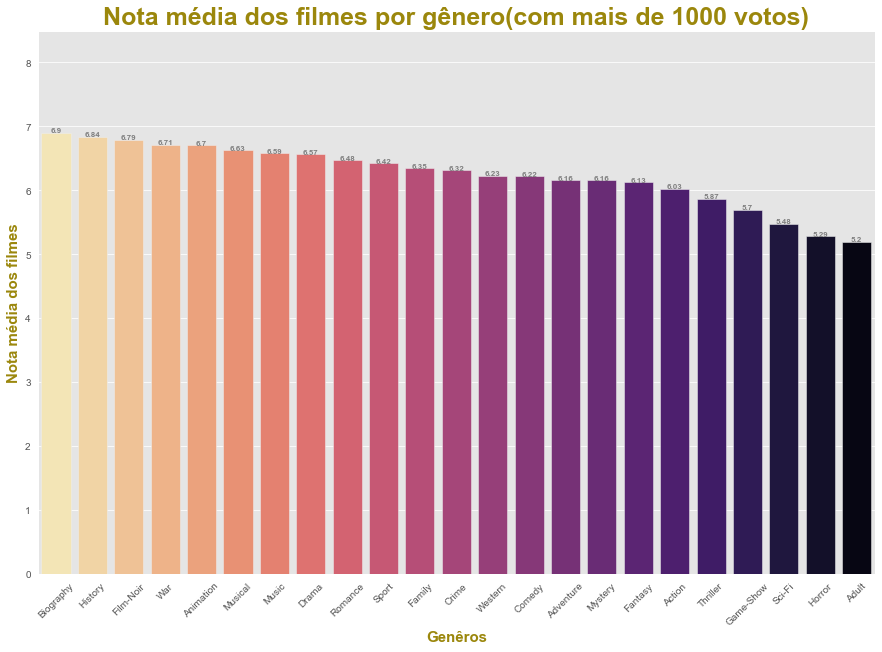

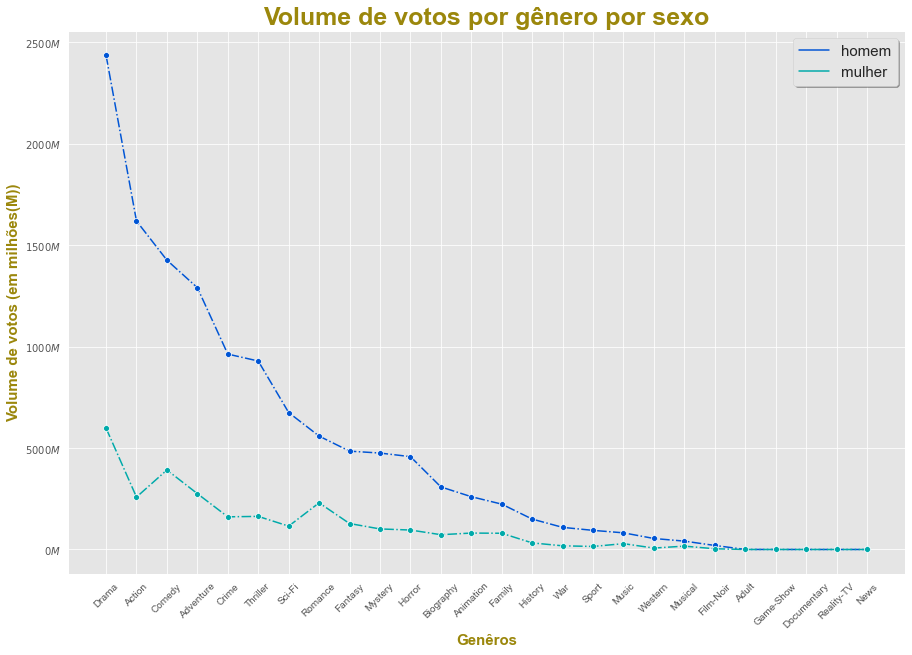

In [45]:

def text(ax):
    '''Colocar o texto em um cima de barras (y) e na meta da barra (x)'''
    for p in ax.patches:
        x = p.get_width()/2 + p.get_x()
        y = p.get_height()
        ax.annotate(p.get_height().round(),(x,y+0.3),ha='center',fontsize=8,color='grey',fontweight='bold')

def formata_milhar(x, pos):
    """The two args are the value and tick position"""
    if x >= 1e8:
        s = f'${x*1e-5:1.0f} M$'
    else:
        s = f'${x*1e-4:1.0f} M$'
    return s

genre = movies.merge(ratings[['mean_vote', 'imdb_title_id','total_votes']], on='imdb_title_id', how='left')[['year','title','mean_vote','genre','total_votes']]
genre['genre']= genre['genre'].str.split(', ')
genre_expl = genre.explode('genre')
genre_agg = genre_expl.groupby('genre')['genre'].count().sort_values(ascending=False)
genre_score = genre_expl.groupby('genre')[['mean_vote','total_votes']].mean().sort_values(by='total_votes',ascending=False)
genre_score = genre_score[genre_score['total_votes']>1000].sort_values(by='mean_vote',ascending=False)

with plt.style.context('ggplot'):
    fig1=plt.figure(figsize=(15,10))
    s1= sns.barplot(x=genre_agg.index,y=genre_agg.values,palette='plasma_r')
    plt.xticks(rotation=45)
    plt.xlabel('Genêros',fontsize=15,fontweight='bold',c='#9B870C')
    plt.ylabel('Número de filmes',fontsize=15,fontweight='bold',c='#9B870C')
    plt.title('Número de filmes por gênero',fontsize=25,fontweight='bold',c='#9B870C')
    for p in s1.patches:
        x = p.get_width()/2 + p.get_x()
        y = p.get_height()
        s1.annotate(int(p.get_height()),(x,y+200),ha='center',fontsize=8,color='grey',fontweight='bold')
    plt.show()


    fig2=plt.figure(figsize=(15,10))
    s2= sns.barplot(x=genre_score.index,y=genre_score['mean_vote'],palette='magma_r')
    plt.xticks(rotation=45)
    plt.ylim(0,8.5)
    plt.xlabel('Genêros',fontsize=15,fontweight='bold',c='#9B870C')
    plt.ylabel('Nota média dos filmes',fontsize=15,fontweight='bold',c='#9B870C')
    plt.title('Nota média dos filmes por gênero(com mais de 1000 votos)',fontsize=25,fontweight='bold',c='#9B870C')
    for p in s2.patches:
        x = p.get_width()/2 + p.get_x()
        y = p.get_height()
        s2.annotate(p.get_height().round(2),(x,y),ha='center',fontsize=8,color='grey',fontweight='bold')
    plt.show()


    gender = movies.merge(right=ratings,how='right',on='imdb_title_id')
    gender['genre']= gender['genre'].str.split(', ')
    gender = gender.explode('genre').groupby('genre')[['males_allages_votes','females_allages_votes']].sum().round().sort_values(by=['males_allages_votes','females_allages_votes'],ascending=False)
    gender.rename(columns={'males_allages_votes':'homem','females_allages_votes':'mulher'},inplace=True)
    gender_melted = gender.reset_index().melt(
    id_vars='genre',
    value_vars=['homem','mulher'],
    var_name='sexo'
    )
    fig3=plt.figure(figsize=(15,10))
    s3= sns.lineplot(data=gender_melted,y='value',x='genre',hue='sexo',palette='winter',marker='o',linestyle='-.')
    plt.xticks(rotation=45)
    plt.xlabel('Genêros',fontsize=15,fontweight='bold',c='#9B870C')
    plt.ylabel('Volume de votos (em milhões(M))',fontsize=15,fontweight='bold',c='#9B870C')
    plt.title('Volume de votos por gênero por sexo',fontsize=25,fontweight='bold',c='#9B870C')
    plt.legend(loc='best',fontsize=15,shadow=True)
    s3.yaxis.set_major_formatter(formata_milhar)
    
    plt.show()
    

# Visualizações em relação as idades

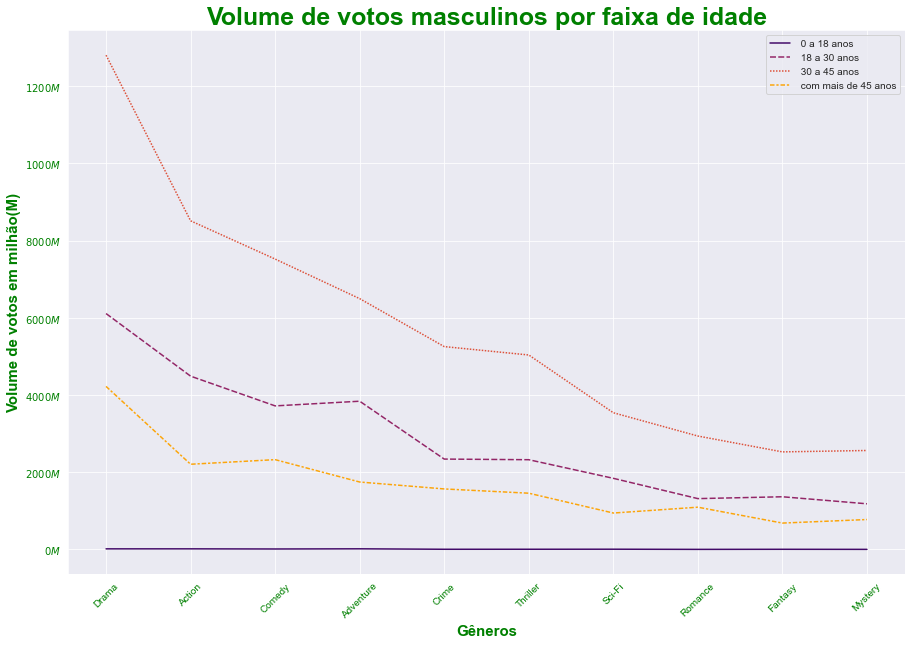

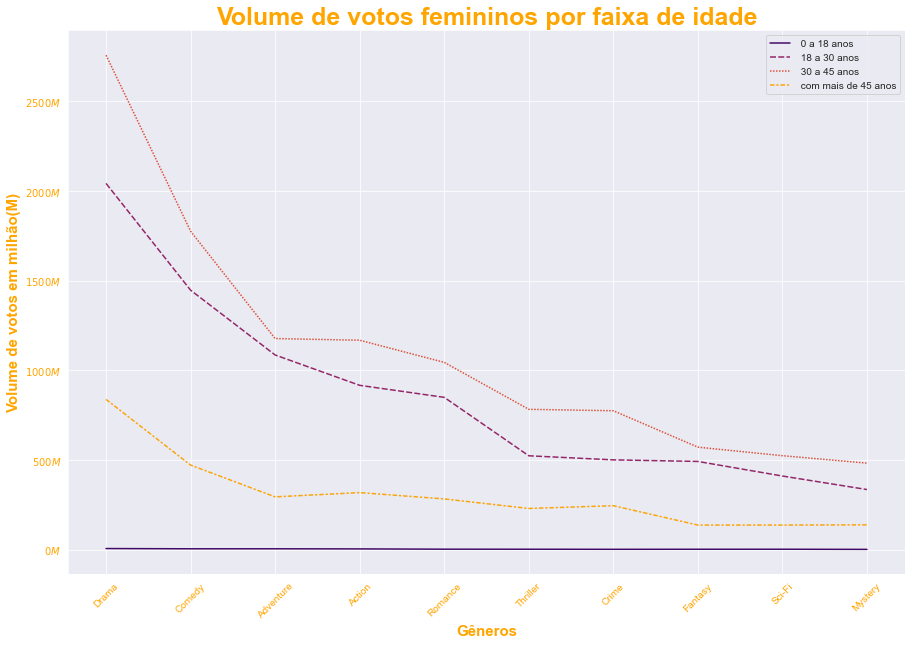

In [80]:
ages_merged = movies.merge(right=ratings,how='right',on='imdb_title_id')
male = ages_merged[['males_0age_votes','males_18age_votes','males_30age_votes','males_45age_votes','genre','imdb_title_id']]
male['genre'] = male['genre'].str.split(', ')
male = male.explode('genre')
male_age = male.groupby('genre')['males_0age_votes','males_18age_votes','males_30age_votes','males_45age_votes'].sum()
male_age['sum'] = male_age.sum(axis=1)
male_age = male_age.sort_values(by='sum',ascending=False).head(10)
male_age.rename(columns={'males_0age_votes':' 0 a 18 anos','males_18age_votes':' 18 a 30 anos','males_30age_votes':' 30 a 45 anos','males_45age_votes':' com mais de 45 anos'},inplace=True)

female = ages_merged[['females_0age_votes','females_18age_votes','females_30age_votes','females_45age_votes','genre','imdb_title_id']]
female['genre'] = female['genre'].str.split(', ')
female = female.explode('genre')
female_age = female.groupby('genre')['females_0age_votes','females_18age_votes','females_30age_votes','females_45age_votes'].sum()
female_age['sum'] = female_age.sum(axis=1)
female_age = female_age.sort_values(by='sum',ascending=False).head(10)
female_age.rename(columns={'females_0age_votes':' 0 a 18 anos','females_18age_votes':' 18 a 30 anos','females_30age_votes':' 30 a 45 anos','females_45age_votes':' com mais de 45 anos'},inplace=True)


with plt.style.context('seaborn-bright'):
    fig=plt.figure(figsize=(15,10))
    s = sns.lineplot(data=male_age.loc[:,:'males_45age_votes'],palette='inferno')
    plt.xticks(rotation=45)
    s.yaxis.set_major_formatter(formata_milhar)
    s.set_ylabel('Volume de votos em milhão(M)',fontsize=15,fontweight='bold',c='green')
    s.set_xlabel('Gêneros',fontsize=15,fontweight='bold',c='green')
    plt.xticks(color='green')
    plt.yticks(color='green')
    plt.title('Volume de votos masculinos por faixa de idade',fontsize=25,fontweight='bold',c='green')

    fig=plt.figure(figsize=(15,10))
    s = sns.lineplot(data=female_age.loc[:,:'females_45age_votes'],palette='inferno')
    plt.xticks(rotation=45)
    s.yaxis.set_major_formatter(formata_milhar)
    s.set_ylabel('Volume de votos em milhão(M)',fontsize=15,fontweight='bold',c='orange')
    s.set_xlabel('Gêneros',fontsize=15,fontweight='bold',c='orange')
    plt.xticks(color='orange')
    plt.yticks(color='orange')
    plt.title('Volume de votos femininos por faixa de idade',fontsize=25,fontweight='bold',c='orange')


# Parte 2: Candlestick

In [113]:
ibov = pd.read_csv('prices.csv')
amz = ibov[ibov['symbol'] == 'AMZN']
amz['date'] = pd.to_datetime(amz['date'])
amz.set_index('date',inplace=True)
amz=amz[-30:]

candlestick = go.Candlestick(
                            x=amz.index,
                            open=amz['open'],
                            high=amz['high'],
                            low=amz['low'],
                            close=amz['close'],
                           increasing_line_color= 'black', decreasing_line_color= 'grey'
                            )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width=1200, height=600,
    title="Amazon, Dez - 2016",
    yaxis_title='AMZN Stock',
    xaxis_rangeslider_visible=False
)
fig.show()